1) 379029
2) 328411
user 1
absent+present


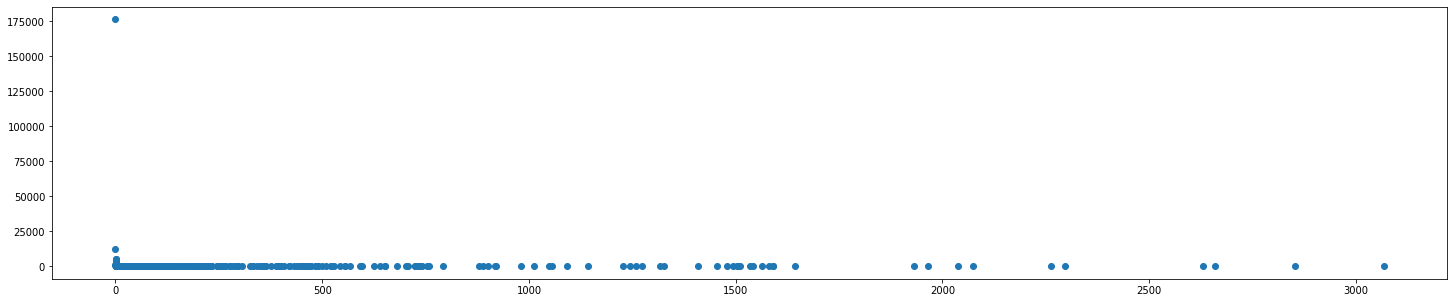

only present


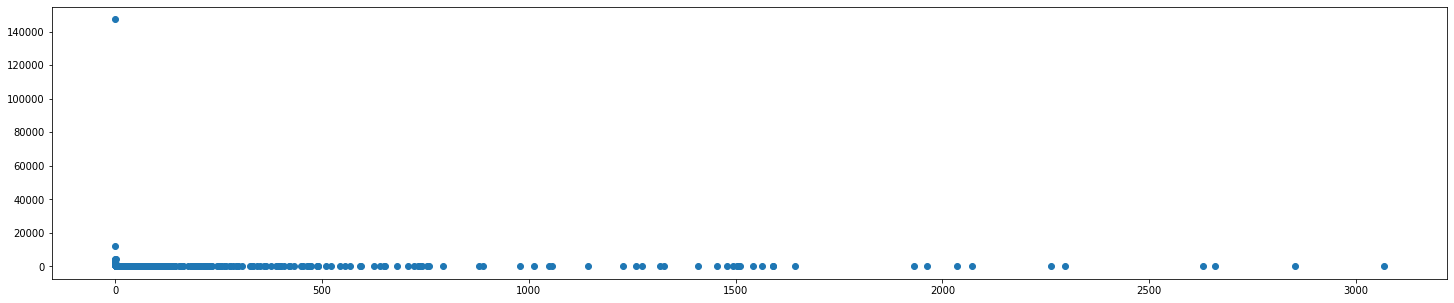

1) 3958
2) 3431
user 2
absent+present


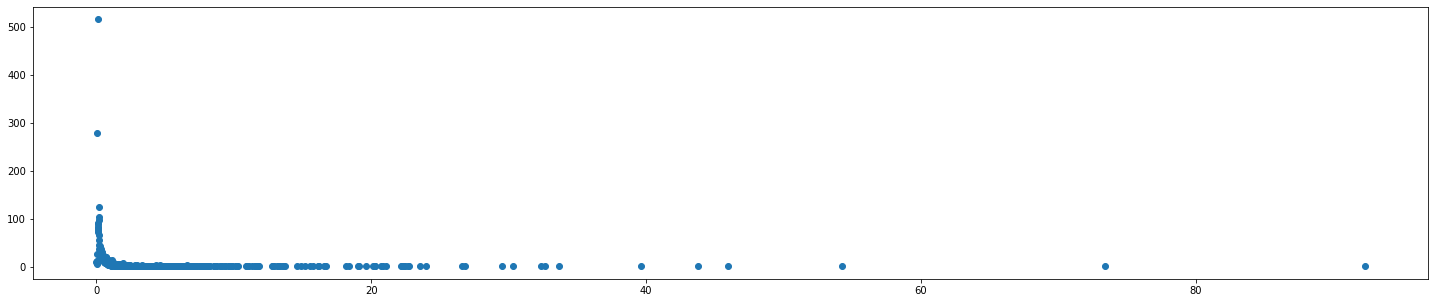

only present


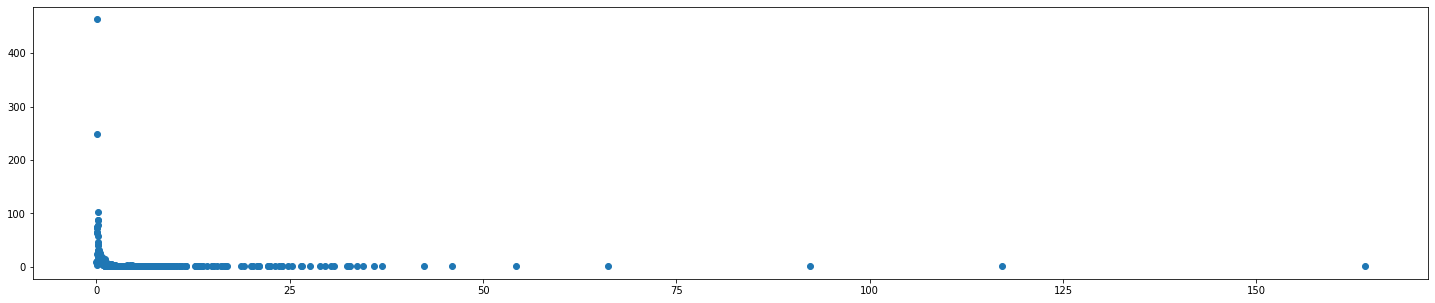

1) 87960
2) 87479
user 3
absent+present


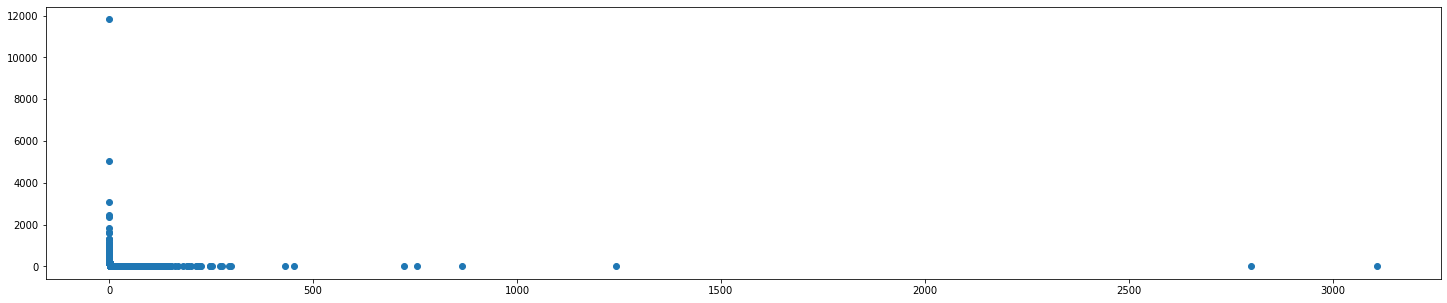

only present


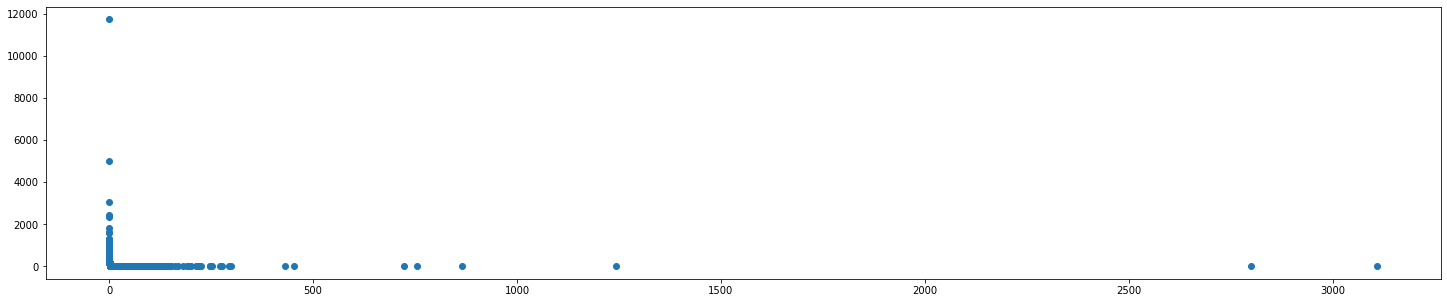

1) 273394
2) 73984
user 4
absent+present


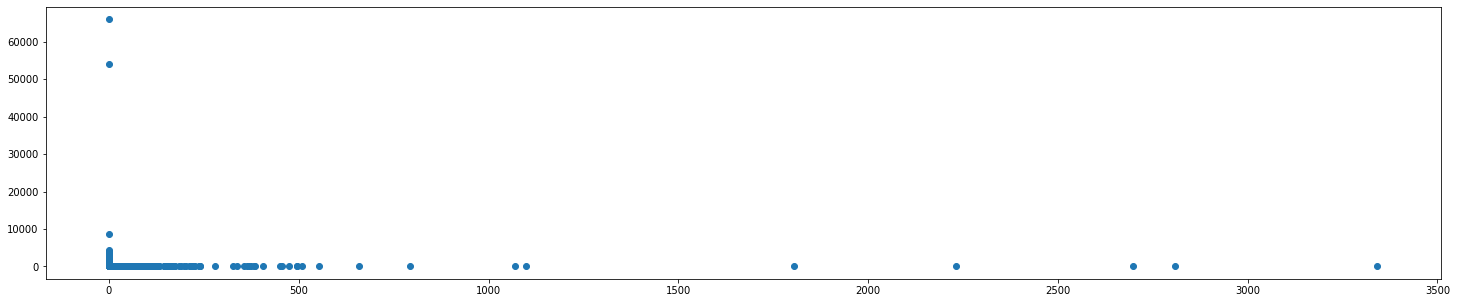

only present


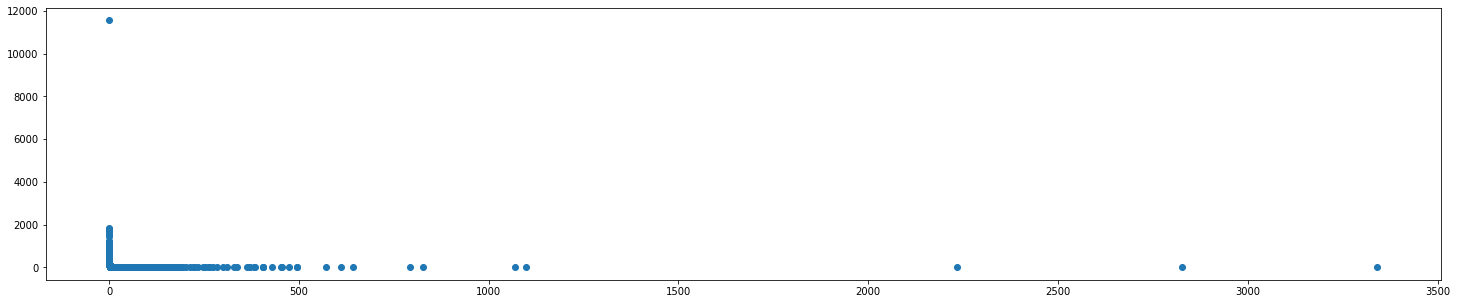

1) 92485
2) 91817
user 5
absent+present


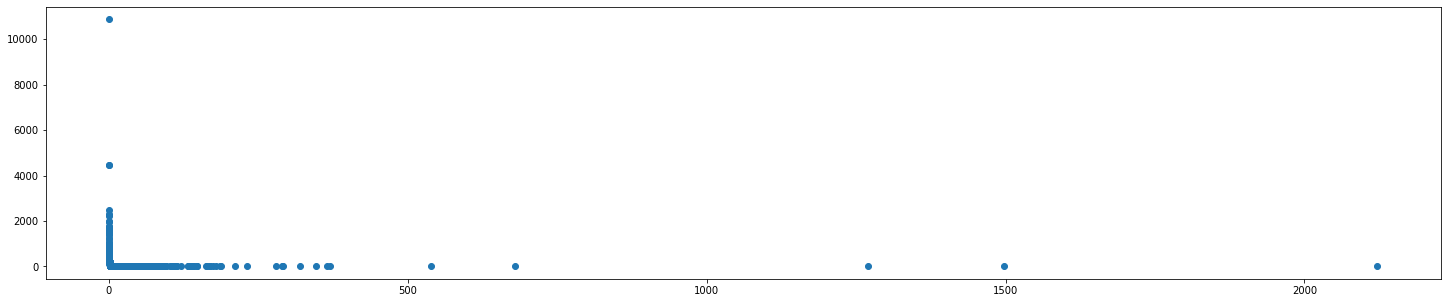

only present


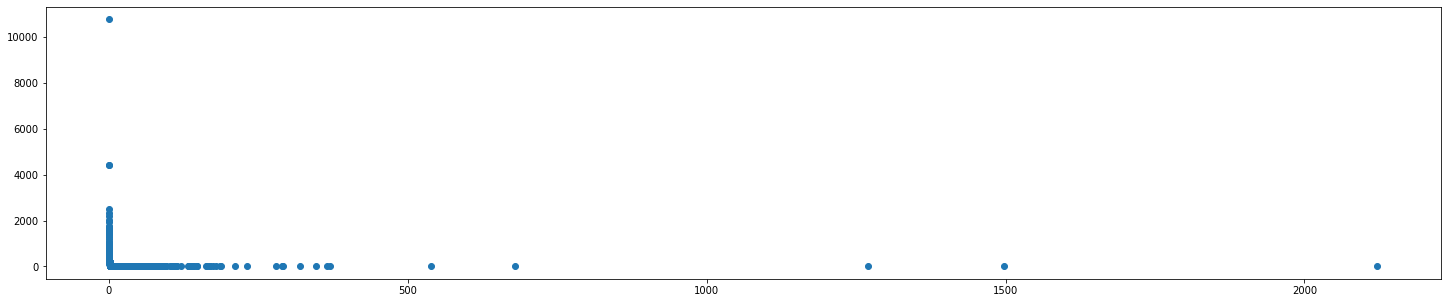

no milliseconds
1) 33583
2) 32284
user 7
absent+present


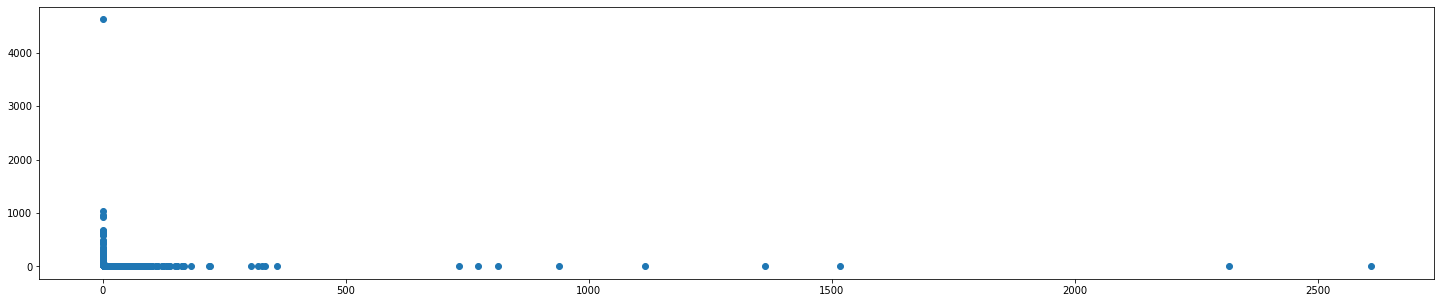

only present


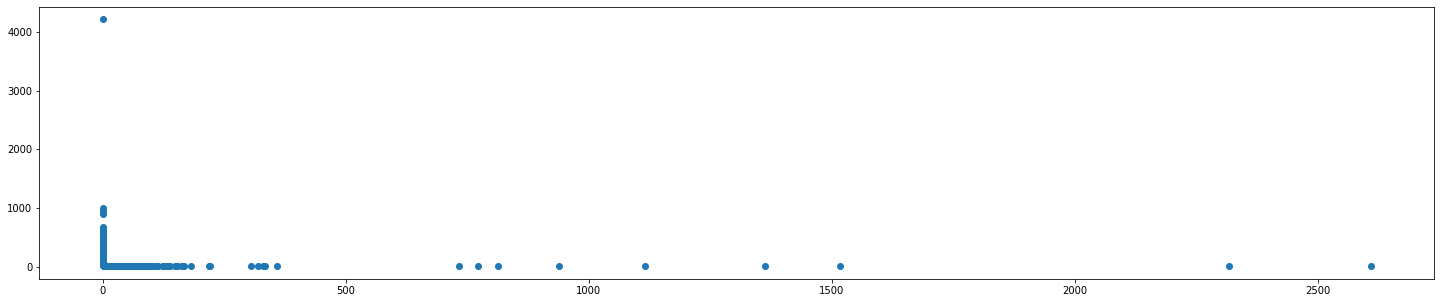

In [8]:
import sqlite3
import datetime
from tabulate import tabulate
import matplotlib.pylab as plt
import numpy as np

def get_data(id):
    con = sqlite3.connect("user"+str(id)+".sqlite")
    
    cur = con.cursor()
    input_signals = []
    recorded_images = []
    matched = []

    for row in cur.execute('SELECT * FROM signals;'): # get input signals
        list_row = list(row)
        try:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S.%f') # cast timestamps from string to datetime
        except ValueError:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S') # for some timestamps there are no milliseconds, so we need to handle it 
            print("no milliseconds") # just to acknowledge user
        input_signals.append(list_row)
    


    for row in cur.execute('SELECT id, dateTime, state FROM images;'): # get image states
        list_row = list(row)
        try:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S')
            print("wrong date format")
        recorded_images.append(list_row)

    con.close()

    for i in range(len(recorded_images)-1):# match user input with the corresponding image state
        records_exist = False
        for user_inp in input_signals:
            if ( user_inp[1] >= recorded_images[i][1] and user_inp[1] < recorded_images[i+1][1]):
                matched.append([ recorded_images[i][0], recorded_images[i][1], recorded_images[i][2], user_inp[0], user_inp[1], user_inp[2], user_inp[3] ])
                records_exist = True
        if records_exist == False:
            matched.append([ recorded_images[i][0], recorded_images[i][1], recorded_images[i][2], None, None, None, None ])
    
    matched = [x for x in matched if x[4] != None] # filtering out states that do not have matched inputs
    print("1)",len(matched))
    previous = matched[0][4]
    times_both_states = {}
    for i in range(1, len(matched)): # calculating gaps
        gap = (matched[i][4]-previous)
        if not (gap.days>0 or gap.seconds//3600>0): # considering only gaps shorter than 1 hour
            gap = gap.total_seconds()
            gap = round(gap, 2)
            if gap in times_both_states:
                times_both_states[gap] += 1
            else:
                times_both_states[gap] = 1
        previous = matched[i][4]
    matched = [x for x in matched if x[2] == "Present"] # filter out all records, except those with 'Present' state
    print("2)",len(matched))
    times = {}
    previous = matched[0][4]
    for i in range(1, len(matched)):
        gap = (matched[i][4]-previous)
        if not (gap.days>0 or gap.seconds//3600>0):
            gap = gap.total_seconds()
            gap = round(gap, 2)
            if gap in times:
                times[gap] += 1
            else:
                times[gap] = 1
        previous = matched[i][4]
    result = [times_both_states, times]
    return result

time_results = []
for i in range(1, 8):
    if i != 9 and i != 6:
        rec = get_data(i)
        print("user",i)
        print("absent+present")
        listed_gaps = sorted(rec[0].items())
        x, y = zip(*listed_gaps) # plotting
        ticks = x[1::2]
        plt.figure(figsize=(25, 5))
        plt.scatter(x, y, marker='o')
        plt.show()
        print("only present")
        listed_gaps = sorted(rec[1].items())
        x2, y2 = zip(*listed_gaps)
        ticks = x2[1::2]
        plt.figure(figsize=(25, 5))
        plt.scatter(x2, y2, marker='o')
        plt.show()

1) 379029
2) 328411
user 1
absent+present


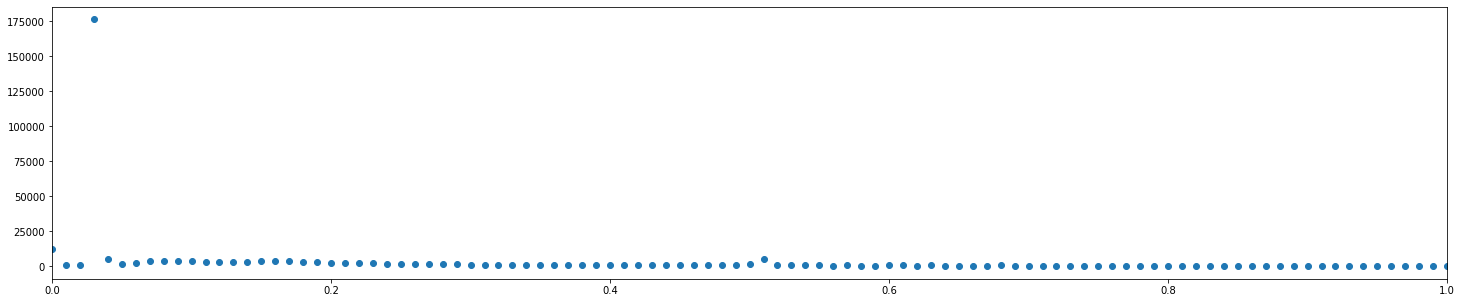

only present


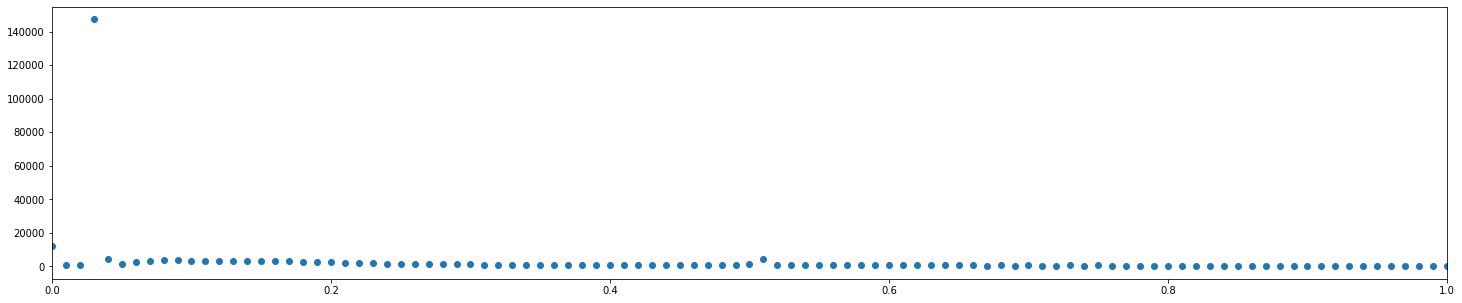

1) 3958
2) 3431
user 2
absent+present


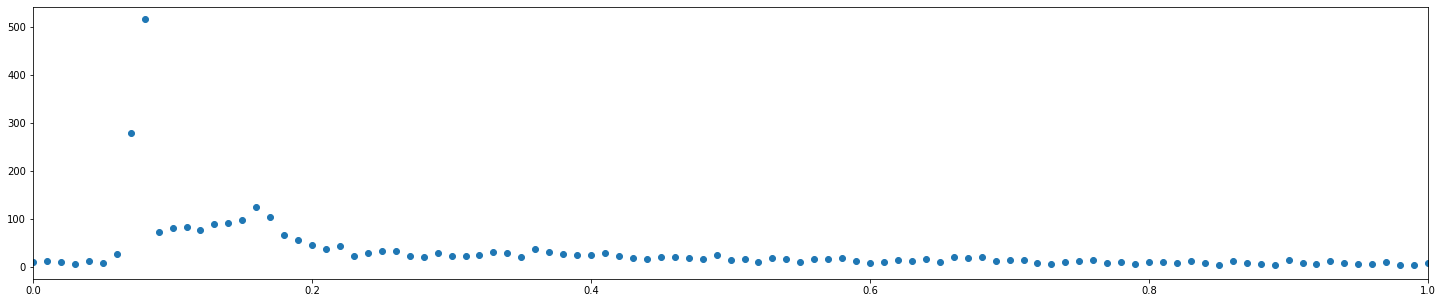

only present


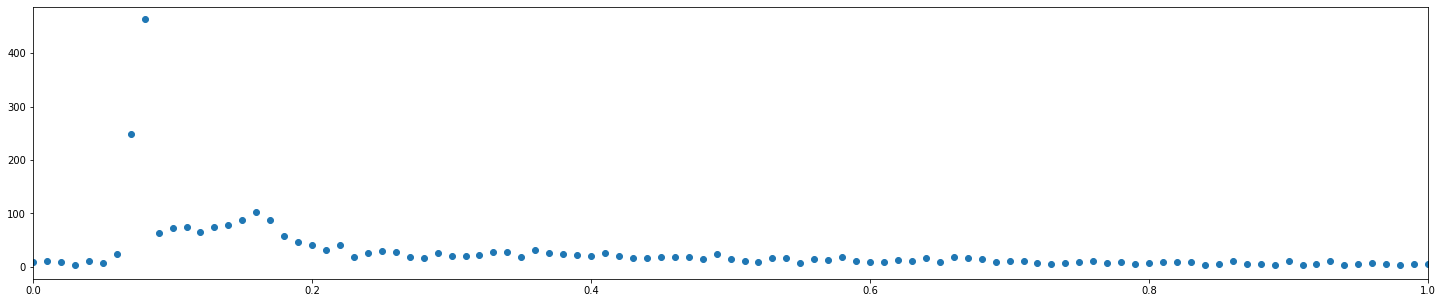

1) 87960
2) 87479
user 3
absent+present


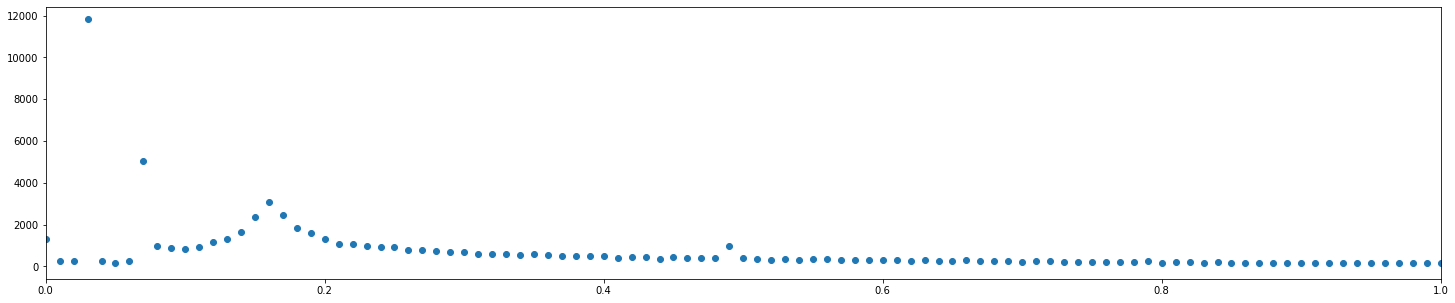

only present


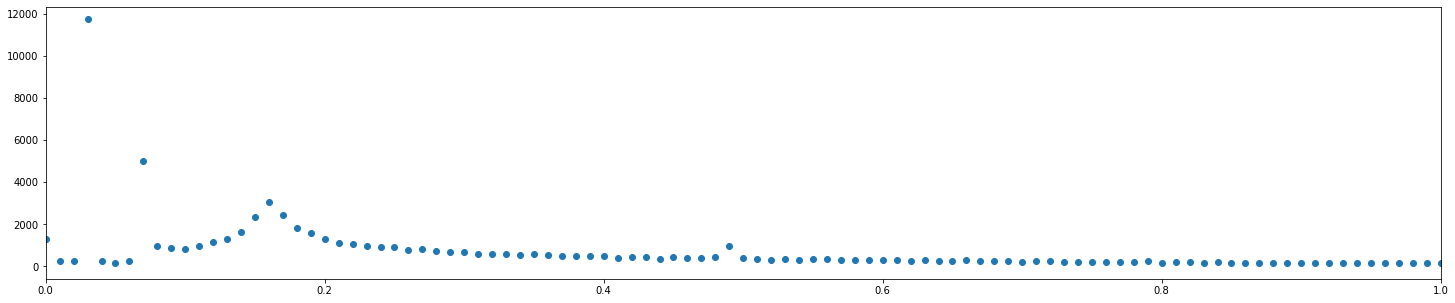

1) 273394
2) 73984
user 4
absent+present


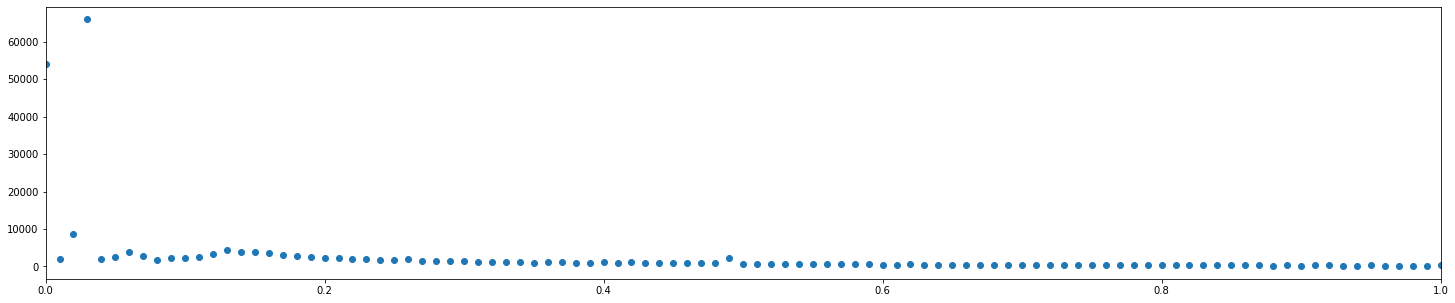

only present


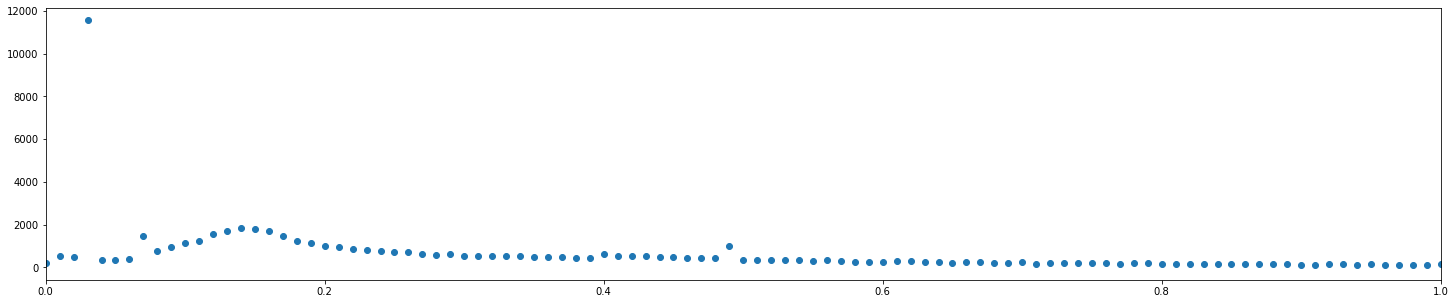

1) 92485
2) 91817
user 5
absent+present


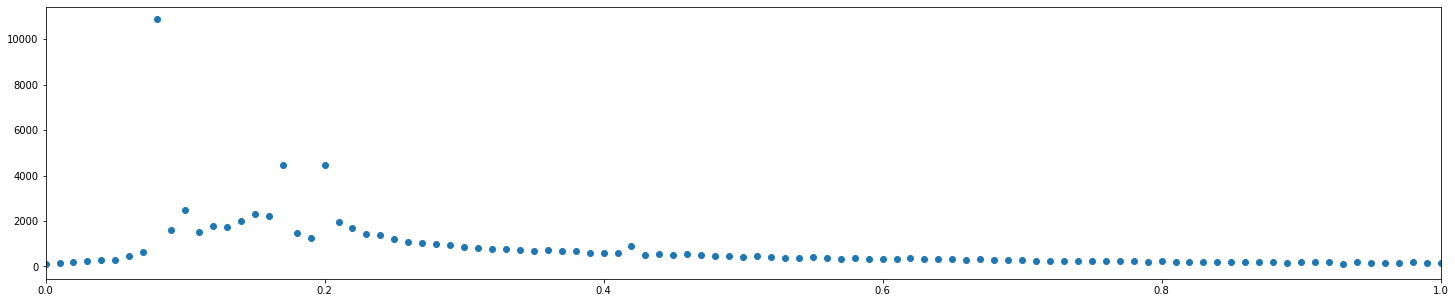

only present


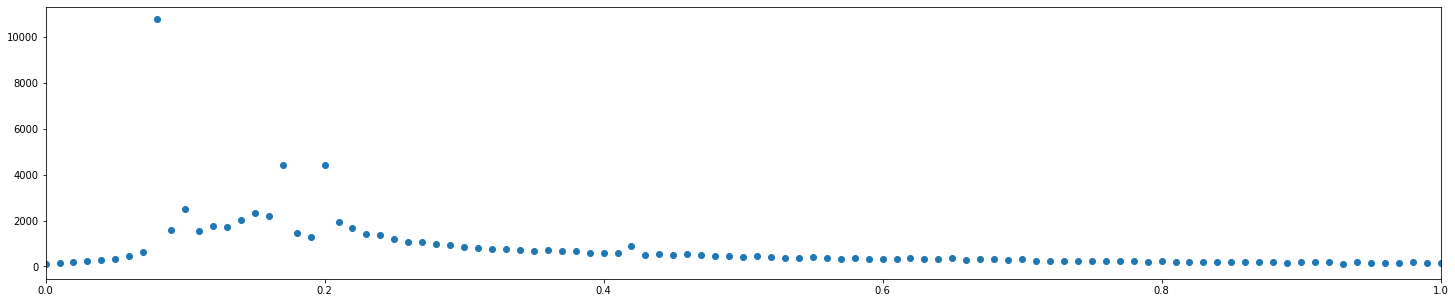

no milliseconds
1) 33583
2) 32284
user 7
absent+present


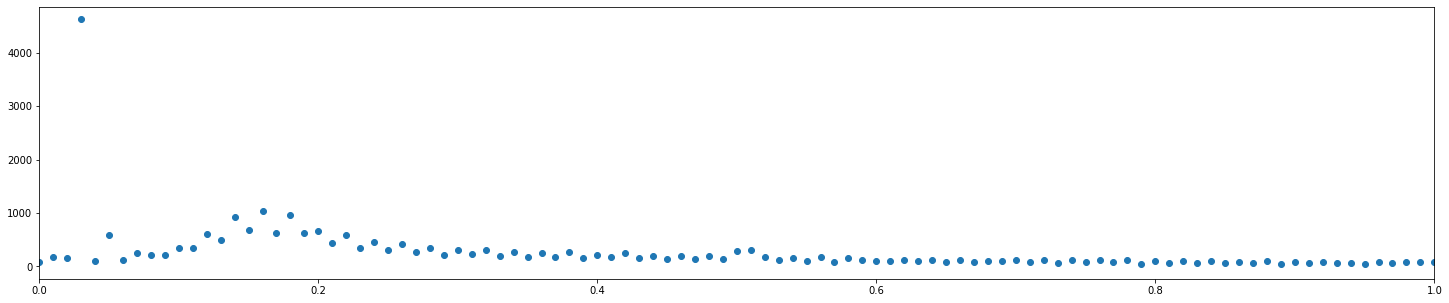

only present


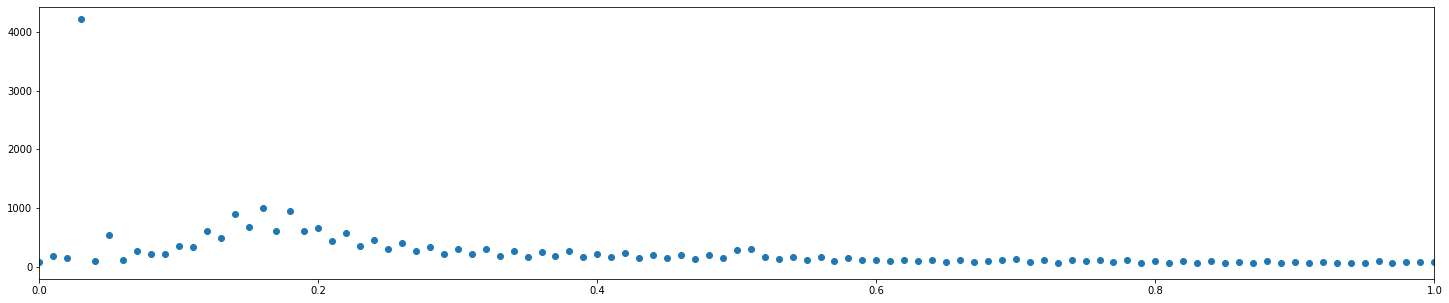

In [9]:
for i in range(1, 8):
    if i != 9 and i != 6:
        rec = get_data(i)
        f = open("results.txt", "w")
        f.write(str(rec))
        f.close()
        print("user",i)
        print("absent+present")
        listed_gaps = sorted(rec[0].items())
        x, y = zip(*listed_gaps)
        ticks = x[1::2]
        plt.figure(figsize=(25, 5))
        plt.xlim([0.0, 1.0]) # plot with limit on x axis
        plt.scatter(x, y, marker='o')
        plt.show()
        print("only present")
        listed_gaps = sorted(rec[1].items())
        x2, y2 = zip(*listed_gaps)
        ticks = x2[1::2]
        plt.figure(figsize=(25, 5))
        plt.xlim([0.0, 1.0])
        plt.scatter(x2, y2, marker='o')
        plt.show()